In [1]:
import json
from backend.models import UserDocument, CV, CVData
from ai_module.lg_models import CVGenState

# Charger les données de test
with open('../../data/user_test_user.json', 'r', encoding='utf-8') as f:
    test_data = json.load(f)

# Créer un UserDocument à partir des données de test
user_doc = UserDocument(**test_data)

# Créer un CVGenState à partir du UserDocument
# Utilisons "CV par défaut" comme nom de CV
cv_state = CVGenState.from_user_document(user_doc, "cv_1")

# Afficher les informations principales du CVGenState
print(f"Nom: {cv_state.head.name}")
print(f"Titre brut: {cv_state.head.title_raw}")
print(f"Titre raffiné: {cv_state.head.title_refined}")
print(f"Email: {cv_state.head.mail}")
print(f"Téléphone: {cv_state.head.tel_refined}")
print(f"\nNombre d'expériences: {len(cv_state.experiences)}")
print(f"Nombre de formations: {len(cv_state.education)}")
print(f"\nCompétences brutes: {cv_state.skills_raw}")
print(f"Langues brutes: {cv_state.langues_raw}")
print(f"Centres d'intérêt: {cv_state.hobbies_refined}")
print(f"\nPoste visé brut: {cv_state.job_raw}")

Nom: Alexis de Monts
Titre brut: Data Engineer | Machine Learning Engineer | Cloud Architect
Titre raffiné: Data Engineer | Machine Learning Engineer | Cloud Architect
Email: alexis.demonts.s@gmail.com
Téléphone: 07 81 37 86 80

Nombre d'expériences: 8
Nombre de formations: 3

Compétences brutes: Cloud (GCP, AWS), DevOps (CI/CD, Docker), MLOps, Data Science, Machine Learning, Data Engineering, Python, SQL, Git, Flutter
Langues brutes: Francais (natif), Anglais (courant), Italien (fonctionnel)
Centres d'intérêt: Technologies emergentes, developpement d'applications, voyages, engagement humanitaire

Poste visé brut: Fiche de Poste - Machine Learning Engineer

Localisation : Paris, France (Hybrid)

Type de Contrat : CDI

Experience : 3+ ans

Salaire : 55k - 75k EUR selon experience

Secteur : Tech / IA / Data


A propos de nous

Nous sommes une startup innovante specialisee dans l'intelligence artificielle et le traitement des donnees a grande echelle. Nous developpons des solutions de Ma

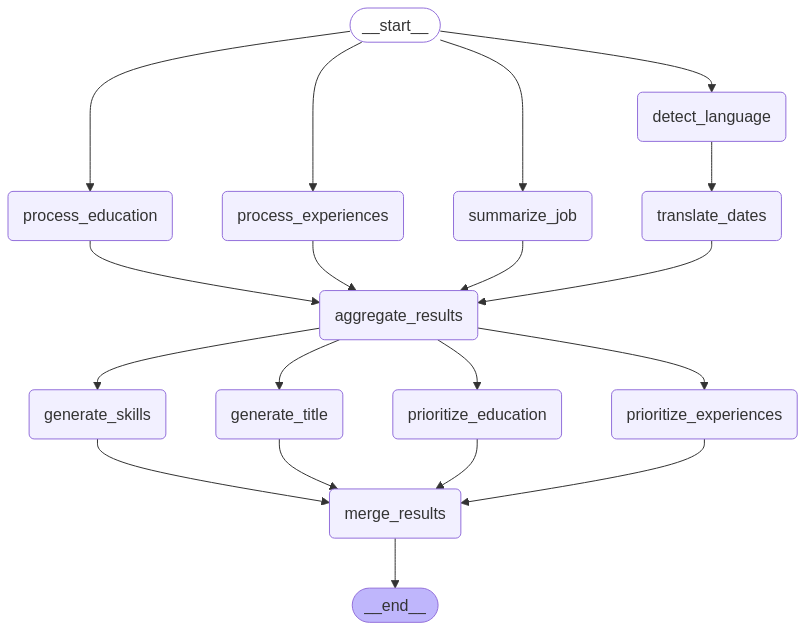

In [3]:
# Importer le graphe compilé pour la génération de CV
from ai_module.chains_gen_cv.global_chain import compiled_gencv_graph
from IPython.display import Image, display

display(Image(compiled_gencv_graph.get_graph().draw_mermaid_png()))

In [2]:
# Tester le noeud translate_and_uniformize_dates
from ai_module.chains_gen_cv.global_chain import translate_and_uniformize_dates

#on impose la langue en anglais pour le test
cv_state.language_cv = "en"

dates_result = translate_and_uniformize_dates(cv_state)
print("Dates des expériences et formations traduites et uniformisées.")
for exp in dates_result['experiences']:
    print(f"Expérience - Dates raffinées: {exp.dates_refined}")
for edu in dates_result['education']:
    print(f"Formation - Dates raffinées: {edu.dates_refined}")

Dates des expériences et formations traduites et uniformisées.
Expérience - Dates raffinées: February 2023 - Present
Expérience - Dates raffinées: December 2022 - Present
Expérience - Dates raffinées: February 2022 - September 2022
Expérience - Dates raffinées: September 2021 - February 2022
Expérience - Dates raffinées: February 2020 - July 2020
Expérience - Dates raffinées: June 2019 - February 2020
Expérience - Dates raffinées: May 2018 - May 2019
Expérience - Dates raffinées: October 2018 - February 2019
Formation - Dates raffinées: 2017 - 2021
Formation - Dates raffinées: 2020 - 2021
Formation - Dates raffinées: 2015 - 2017


In [ ]:
# Tester le graphe compilé pour la génération de CV
result = compiled_gencv_graph.invoke(cv_state)


In [ ]:
# Afficher les champs les plus importants du résultat final
print("\nRésultat final du graphe :")
print(f"Nom: {result['head'].name}")
print(f"Titre généré: {result['head'].title_generated}")
print(f"Email: {result['head'].mail}")
print(f"Téléphone: {result['head'].tel_refined}")
print(f"\nNombre d'expériences: {len(result['experiences'])}")
print(f"Nombre de formations: {len(result['education'])}")
print(f"\nCompétences: {result['competences']}")
print(f"Langues: {result['langues']}")
print(f"Centres d'intérêt: {result['hobbies_refined']}")
print(f"\nPoste visé raffiné: {result['job_refined']}")